<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/Regression-Projects/blob/main/01-Credit_Card_Balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Balance
This dataset contains information about credit card balance. This data can be used for a lot of purposes such as credit card balance prediction. The columns in the given dataset are as follows:
- Income
- Limit
- Rating
- Cards
- Age
- Education
- Gender
- Student
- Married
- Ethnicity
- Balance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm

In [ ]:
# load data
data = pd.read_csv('CreditCardBalance.csv')

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### Data Exploration

In [ ]:
#  Data Exploration
print('Number of Rows: ', data.shape[0])
print('Number of Columns: ', data.shape[1], '\n')
print('Columns Names:', data.columns, '\n')
print('SubSet of Data:\n ', data.head().to_string(), '\n')
print('Data Information: '); print(data.info(), '\n')
print('Data Describe:\n ', data.describe(), '\n')

Number of Rows:  400
Number of Columns:  12 

Columns Names: Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object') 

SubSet of Data:
     Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student Married  Ethnicity  Balance
0           1   14.891   3606     283      2   34         11    Male      No     Yes  Caucasian      333
1           2  106.025   6645     483      3   82         15  Female     Yes     Yes      Asian      903
2           3  104.593   7075     514      4   71         11    Male      No      No      Asian      580
3           4  148.924   9504     681      3   36         11  Female      No      No      Asian      964
4           5   55.882   4897     357      2   68         16    Male      No     Yes  Caucasian      331 

Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns)

In [ ]:
# Data Exploration
print('Male Count: ', dataSet['Gender'][dataSet['Gender'] == ' Male'].count())
print('Female Count: ', dataSet['Gender'][dataSet['Gender'] == 'Female'].count())
print('Student Count: ', dataSet['Student'][dataSet['Student'] == 'Yes'].count())
print('Not Student Count: ', dataSet['Student'][dataSet['Student'] == 'No'].count())
print('Married Count: ', dataSet['Married'][dataSet['Married'] == 'Yes'].count())
print('Not Married Count: ', dataSet['Married'][dataSet['Married'] == 'No'].count())
print('African American Count: ', dataSet['Ethnicity'][dataSet['Ethnicity'] == 'African American'].count())
print('Asian Count: ', dataSet['Ethnicity'][dataSet['Ethnicity'] == 'Asian'].count())
print('Caucasian Count: ', dataSet['Ethnicity'][dataSet['Ethnicity'] == 'Caucasian'].count())

Male Count:  193
Female Count:  207
Student Count:  40
Not Student Count:  360
Married Count:  245
Not Married Count:  155
African American Count:  99
Asian Count:  102
Caucasian Count:  199


### Data Preparation

In [ ]:
dataSet['Gender'].replace([' Male', 'Female'], [1, 0], inplace=True)
dataSet['Student'].replace(['Yes', 'No'], [1, 0], inplace=True)
dataSet['Married'].replace(['Yes', 'No'], [1, 0], inplace=True)
dataSet['Ethnicity'].replace(['African American', 'Asian', 'Caucasian'],
                             [1, 2, 3], inplace=True)

## Data Visualization

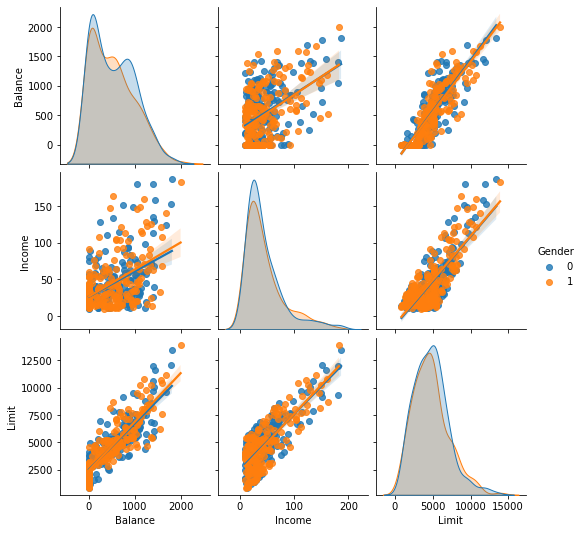

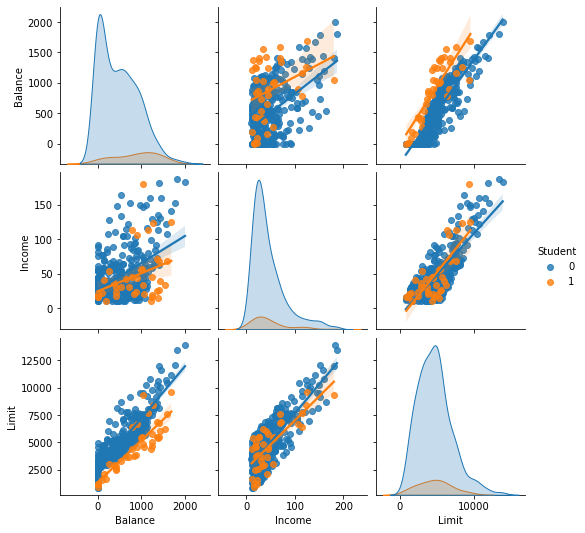

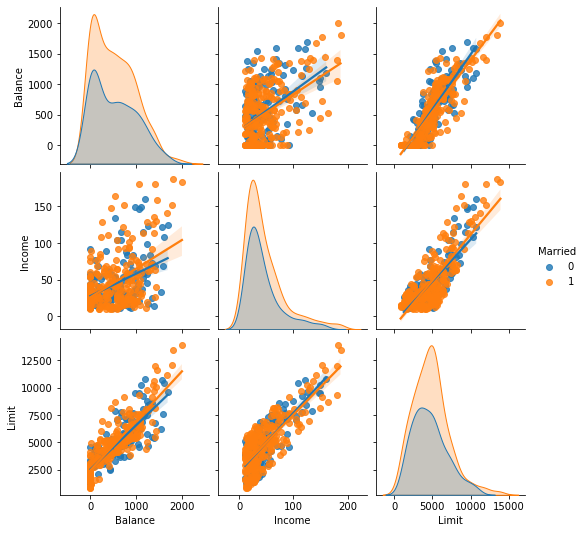

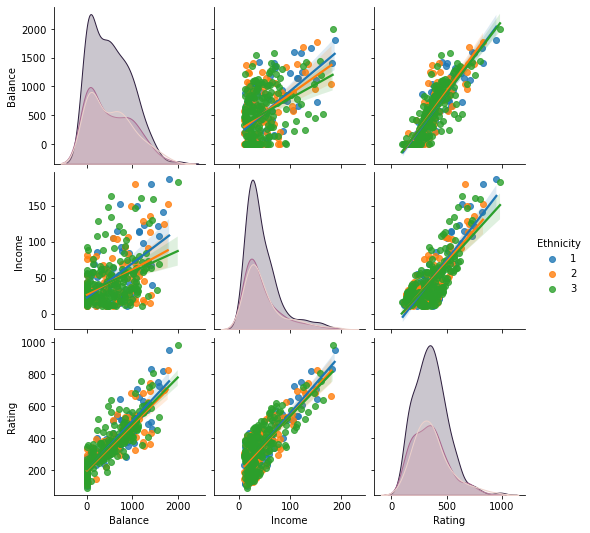

In [ ]:
sns.pairplot(dataSet, vars=['Balance', 'Income', 'Limit'], kind='reg', hue='Gender')
plt.show()
sns.pairplot(dataSet, vars=['Balance', 'Income', 'Limit'], kind='reg', hue='Student')
plt.show()
sns.pairplot(dataSet, vars=['Balance', 'Income', 'Limit'],kind='reg', hue='Married')
plt.show()
sns.pairplot(dataSet, vars=['Balance', 'Income', 'Rating'], kind='reg', hue='Ethnicity')
plt.show()


In [ ]:
# Determine x and y
x = dataSet.iloc[:, [0, 1, 6, 7, 8, 9]]
y = dataSet.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### VIF

    Features        VIF
0     Income   6.995223
1      Limit  11.373796
2     Gender   1.803537
3    Student   1.099014
4    Married   2.410183
5  Ethnicity   4.508711
Balance       1.000000
Rating        0.863625
Limit         0.861697
Income        0.463656
Cards         0.086456
Unnamed: 0    0.006064
Age           0.001835
Education    -0.008062
Name: Balance, dtype: float64


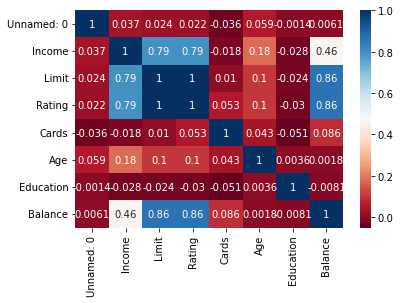

In [ ]:
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]
print(vif_data)

# Corrleation
print(data.corr()['Balance'].sort_values(ascending=False))
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

## Linear Regression

In [ ]:
print('Linear Regression')
linReg = LinearRegression()
linModel = linReg.fit(x_train, y_train)
y_predict = linReg.predict(x_test)
print('MSE', np.sqrt(mean_squared_error(y_test, y_predict)))
r_score = metrics.r2_score(y_test, y_predict) * 100
print("linear Regression model accuracy(in %):",
      int(r_score), '%')
print('Model intercept: ', linReg.intercept_)
print('Model coefficient: ', linReg.coef_)
model = sm.OLS(y_train, x_train).fit()
y_predict = model.predict(x_test)
print(model.summary())



Linear Regression
MSE 113.85977907830461
linear Regression model accuracy(in %): 94 %
Model intercept:  -448.8451473297809
Model coefficient:  [-7.75168967e+00  2.65847256e-01  4.07436951e+00  4.26787481e+02
  1.96750450e+00  5.81392724e+00]
                                 OLS Regression Results                                
Dep. Variable:                Balance   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              948.4
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                   7.04e-198
Time:                        17:09:36   Log-Likelihood:                         -2067.5
No. Observations:                 320   AIC:                                      4147.
Df Residuals:                     314   BIC:                                      4170.
Df Model:                           6                 

## Lasso Regression


In [ ]:
print('Lasso Regression')
lassoReg = Lasso(alpha=5)
lassoModel = lassoReg.fit(x_train, y_train)
y_lassoPredict = lassoReg.predict(x_test)
print('MSE', np.sqrt(mean_squared_error(y_test, y_lassoPredict)))
r_scoreLasso = metrics.r2_score(y_test, y_lassoPredict) * 100
print("linear Regression model accuracy(in %):",
      int(r_scoreLasso), '%')
print('Model intercept: ', lassoReg.intercept_)
print('Model coefficient: ', lassoReg.coef_)


Lasso Regression
MSE 116.46340144703866
linear Regression model accuracy(in %): 94 %
Model intercept:  -426.7351904458025
Model coefficient:  [-7.67133608e+00  2.65007372e-01  0.00000000e+00  3.64224589e+02
  0.00000000e+00  0.00000000e+00]


## Ridge Regression

In [ ]:
print('Ridge Regression')
RidgeReg = Ridge(alpha=5)
RidgeModel = RidgeReg.fit(x_train, y_train)
y_RidgePredict = RidgeReg.predict(x_test)
print('MSE', np.sqrt(mean_squared_error(y_test, y_RidgePredict)))
r_scoreRidge = metrics.r2_score(y_test, y_RidgePredict) * 100
print("linear Regression model accuracy(in %):",
      int(r_scoreRidge), '%')
print('Model intercept: ', RidgeReg.intercept_)
print('Model coefficient: ', RidgeReg.coef_)


Ridge Regression
MSE 117.04904431135934
linear Regression model accuracy(in %): 94 %
Model intercept:  -437.5889289875931
Model coefficient:  [-7.66092633e+00  2.64877166e-01  8.37029763e-01  3.57522575e+02
 -7.30340667e-01  5.26692549e+00]
